In [2]:
import os
os.chdir("/data/adv_geom/src/expB/")



# Generate the dataset

In [2]:
%run -i spheres_v2.py --config ./data_configs/sphere_config.json --save_dir /azuredrive/datasets/expB/one_sphere/max_norm=1,D=0.5,n=2/



center generated
points generated
pre-images generated
[100. 100. 100. ... 100. 100. 100.]
embedding done
center generated
points generated
pre-images generated
[100. 100. 100. ... 100. 100. 100.]
embedding done
center generated
points generated
pre-images generated
[100. 100. 100. ... 100. 100. 100.]
embedding done


In [3]:
%run -i learn_mfld_distance.py \
--train --batch_size 512 --cuda --task regression --num_epochs 500\
--savedir /data/adv_geom/dumps/expB_learning_distance_from_mfld/ --name MLP_OneSphere_data{max_norm=1,D=0.5,n=2}_model{hidden_sizes=512x4}\
--warmup 10 --cooldown 300 --train_fn /azuredrive/datasets/expB/one_sphere/max_norm=1,D=0.5,n=2/train_set.pt \
--val_fn /azuredrive/datasets/expB/one_sphere/max_norm=1,D=0.5,n=2/val_set.pt \
--lr 1e-5 --num_classes 1 





 42%|████▏     | 212/500 [07:08<09:42,  2.02s/it]


KeyboardInterrupt: 

In [3]:
%run -i learn_mfld_distance.py --help




usage: learn_mfld_distance.py [-h] [--train] [--batch_size BATCH_SIZE]
                              [--cuda] [--task TASK] [--num_epochs NUM_EPOCHS]
                              [--savedir SAVEDIR] [--name NAME]
                              [--warmup WARMUP] [--cooldown COOLDOWN]
                              [--lr LR] [--init_wts INIT_WTS]
                              [--num_classes NUM_CLASSES]
                              [--train_fn TRAIN_FN] [--val_fn VAL_FN]
                              [--test_fn TEST_FN] [--generate]
                              [--dataseed DATASEED]

optional arguments:
  -h, --help            show this help message and exit
  --train               enable train mode
  --batch_size BATCH_SIZE
                        batch size
  --cuda                use GPUs
  --task TASK           'classification' or 'regression'
  --num_epochs NUM_EPOCHS
                        number of epochs
  --savedir SAVEDIR     save directory path
  --name NAME           name o

In [10]:
torch.mean(val_loss_matrix, axis=1)

tensor([2.0343e+02, 1.2789e+02, 1.2454e+02, 1.2308e+02, 1.2219e+02, 1.2159e+02,
        1.2117e+02, 1.2086e+02, 1.2064e+02, 1.2050e+02, 1.2040e+02, 1.2034e+02,
        1.2031e+02, 1.2029e+02, 1.2028e+02, 1.2027e+02, 1.2027e+02, 1.2027e+02,
        1.2027e+02, 1.2027e+02, 1.2027e+02, 1.2027e+02, 1.2027e+02, 1.2027e+02,
        1.2027e+02, 1.2027e+02, 1.2027e+02, 1.2027e+02, 1.2027e+02, 1.2026e+02,
        1.2026e+02, 1.2026e+02, 1.2026e+02, 1.2027e+02, 1.2027e+02, 1.2026e+02,
        1.2026e+02, 1.2027e+02, 1.2026e+02, 1.2026e+02, 1.2026e+02, 1.2026e+02,
        1.2026e+02, 1.2026e+02, 1.2026e+02, 1.2026e+02, 1.2029e+02, 1.2027e+02,
        1.2026e+02, 1.2026e+02, 1.2026e+02, 1.2026e+02, 1.2026e+02, 1.2026e+02,
        1.2027e+02, 1.2030e+02, 1.2028e+02, 1.2025e+02, 1.2025e+02, 1.2027e+02,
        1.2025e+02, 1.2042e+02, 1.2025e+02, 1.2024e+02, 1.2024e+02, 1.2028e+02,
        1.2026e+02, 1.2036e+02, 1.2167e+02, 1.2047e+02, 1.2024e+02, 1.2237e+02,
        1.2530e+02, 1.2042e+02, 1.2297e+

In [15]:
train_perm_2 = torch.load("/azuredrive/dumps/train_perm.pt")

In [16]:
train_perm_2[:20]

tensor([37542, 44491,   216, 43688, 41558, 32245, 27206, 10863,  2190, 31849,
        25408, 33504, 27102, 21934, 40181, 47682, 45747, 17004, 43777,  7433])

In [4]:
torch.save(val_loss_matrix, "/data/adv_geom/dumps/expB_learning_distance_from_mfld/val_loss_matrix.pt")




In [5]:
! ls /data/adv_geom/dumps/expB_learning_distance_from_mfld/



23042021-182541  CIFAR_ResNet18			     CIFAR_ResNet18_clf_1e_5
24042021-175508  CIFAR_ResNet18_1e_2_sgd_warmup      CIFAR_ResNet18_clf_1e_6
25042021-142626  CIFAR_ResNet18_1e_5		     train_loss_matrix.pt
25042021-190755  CIFAR_ResNet18_1e_5_adam_no_warmup  val_loss_matrix.pt
25042021-192549  CIFAR_ResNet18_1e_5_late_lr_toggle
25042021-192916  CIFAR_ResNet18_clf


In [63]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler

In [90]:
train_points = train_set.points_n.numpy()[:25000]
train_distances = train_set.actual_distances.numpy().reshape(-1)[:25000]



scaler = StandardScaler()
train_points = scaler.fit_transform(train_points)



In [91]:
regression_model = Lasso()
regression_model.fit(train_points, train_distances)

Lasso()

In [92]:
val_points = val_set.points_n.numpy()[:5000]
val_distances = val_set.actual_distances.numpy().reshape(-1)[:5000]

val_points = scaler.transform(val_points)

In [93]:
val_distances_pred = regression_model.predict(val_points)

In [94]:
from sklearn.metrics import mean_squared_error

In [95]:
mean_squared_error(val_distances, val_distances_pred, squared=True)

13.089224

(array([   0.,    0.,    0.,    0.,    0., 5000.,    0.,    0.,    0.,
           0.]),
 array([5.743773, 5.843773, 5.943773, 6.043773, 6.143773, 6.243773,
        6.343773, 6.443773, 6.543773, 6.643773, 6.743773], dtype=float32),
 <BarContainer object of 10 artists>)

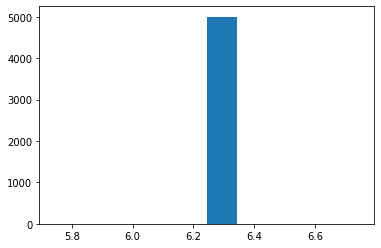

In [97]:
plt.hist(val_distances_pred)

(array([486., 500., 478., 498., 492., 502., 493., 488., 566., 497.]),
 array([9.8484452e-04, 1.2504337e+00, 2.4998825e+00, 3.7493312e+00,
        4.9987803e+00, 6.2482290e+00, 7.4976778e+00, 8.7471266e+00,
        9.9965754e+00, 1.1246024e+01, 1.2495473e+01], dtype=float32),
 <BarContainer object of 10 artists>)

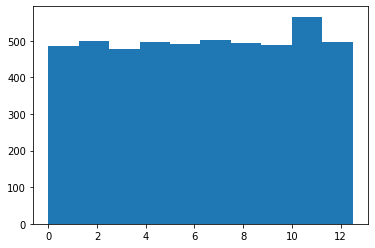

In [98]:
plt.hist(val_distances)